# Crawling

In [77]:
import wikipedia
import csv

wikipedia.set_lang("id")

judul = ["TVRI", "TVRI World", "TVRI Sport", "RCTI", "MNCTV", "GTV", "iNews", "SCTV", "Indosiar", "Moji"]

with open('wikipedia_pages.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Judul", "Konten"])

    for i in judul:
        halaman = wikipedia.page(i)
        konten = halaman.content 
        writer.writerow([i, konten])
        print(f"Berhasil menyimpan: {i}")


Berhasil menyimpan: TVRI
Berhasil menyimpan: TVRI World
Berhasil menyimpan: TVRI Sport
Berhasil menyimpan: RCTI
Berhasil menyimpan: MNCTV
Berhasil menyimpan: GTV
Berhasil menyimpan: iNews
Berhasil menyimpan: SCTV
Berhasil menyimpan: Indosiar
Berhasil menyimpan: Moji


Melakukan pengambilan data dari Wikipedia dan menyimpannya dalam file CSV. Pertama, modul wikipedia dan csv diimpor untuk mengakses halaman Wikipedia dan menulis data ke file CSV. Bahasa Wikipedia diatur ke Bahasa Indonesia dengan wikipedia.set_lang("id").

Daftar judul halaman Wikipedia dari beberapa stasiun TV Indonesia disimpan dalam variabel judul. Kemudian, file CSV bernama wikipedia_pages.csv dibuat untuk menampung judul dan konten halaman yang diambil. Looping melalui daftar judul akan mengambil konten dari masing-masing halaman Wikipedia, yang kemudian disimpan ke dalam file CSV beserta judulnya. Setiap kali konten berhasil disimpan, pesan berhasil ditampilkan di konsol.

In [78]:
import pandas as pd
data = pd.read_csv("wikipedia_pages.csv")
data

,Judul,Konten
0,TVRI,Televisi Republik Indonesia (TVRI) adalah jari...
1,TVRI World,TVRI World (sebelumnya bernama TVRI 3 dan TVRI...
2,TVRI Sport,TVRI Sport (sebelumnya bernama TVRI 4 dan TVRI...
3,RCTI,RCTI (singkatan dari Rajawali Citra Televisi ...
4,MNCTV,MNCTV (pelafalan dalam bahasa Indonesia: [emen...
5,GTV,GTV (pelafalan dalam bahasa Indonesia: [dʒitif...
6,iNews,iNews (pelafalan dalam bahasa Indonesia: [ˈaj....
7,SCTV,SCTV (singkatan dari Surya Citra Televisi) ada...
8,Indosiar,Indosiar (secara resmi bernama Indosiar Visual...
9,Moji,"Moji (digayakan sebagai mOȷı, sebelumnya berna..."


Dengan menggunakan pustaka pandas, file wikipedia_pages.csv dibaca sebagai dataframe melalui fungsi pd.read_csv(). 

In [79]:
print(data["Konten"])

0    Televisi Republik Indonesia (TVRI) adalah jari...
1    TVRI World (sebelumnya bernama TVRI 3 dan TVRI...
2    TVRI Sport (sebelumnya bernama TVRI 4 dan TVRI...
3    RCTI  (singkatan dari Rajawali Citra Televisi ...
4    MNCTV (pelafalan dalam bahasa Indonesia: [emen...
5    GTV (pelafalan dalam bahasa Indonesia: [dʒitif...
6    iNews (pelafalan dalam bahasa Indonesia: [ˈaj....
7    SCTV (singkatan dari Surya Citra Televisi) ada...
8    Indosiar (secara resmi bernama Indosiar Visual...
9    Moji (digayakan sebagai mOȷı, sebelumnya berna...
Name: Konten, dtype: object


Isi dari setiap dokumen berada di "Konten" dalam dataframe data

# Prepocessing

In [80]:
import re
from nltk import word_tokenize
def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() 
    for s in sents:
        s = s.strip().lower() 
        s = s.replace("\n", " ") 
        s = re.sub(r' [^a-zA-Z0-9 ]', ' ', s) 
        s = re.sub(' +', ' ', s) 
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in data["Konten"]:
    docs_clear.append(preprocess(d))

Fungsi preprocess bertujuan untuk membersihkan teks sebelum dianalisis lebih lanjut. Dengan menggunakan fungsi word_tokenize dari NLTK, teks dipecah menjadi token-token kata. Kemudian, setiap kata diproses dengan menghapus spasi berlebih, mengonversi huruf menjadi huruf kecil, dan menghapus karakter non-alfanumerik.

Setelah pembersihan selesai, hasil tokenisasi disatukan kembali dalam bentuk string yang siap untuk analisis. Seluruh konten dari kolom "Konten" pada dataframe diproses menggunakan fungsi ini, dan hasilnya disimpan dalam daftar docs_clear.

## Stopword

In [81]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

kalimat = []
for i in docs_clear:
    stop = stopword.remove(i)
    kalimat.append(stop)
print(kalimat)

["televisi republik indonesia ( tvri ) jaringan televisi publik berskala nasional indonesia . tvri berstatus lembaga penyiaran publik bersama radio republik indonesia ( rri ) , ditetapkan melalui undang-undang no . 32/2002 penyiaran . tvri merupakan jaringan televisi pertama indonesia , mulai mengudara tanggal 24 agustus 1962 diperingati hari televisi nasional . tvri memonopoli siaran televisi indonesia hingga tahun 1989 , televisi swasta pertama indonesia , rcti didirikan . tvri mengudara seluruh wilayah indonesia menjalankan 3 saluran televisi nasional 35 stasiun televisi daerah , didukung 361 stasiun transmisi ( termasuk 129 stasiun transmisi digital ) seluruh indonesia . televisi konvensional , siaran tvri ditonton melalui siaran streaming situs resmi , aplikasi tvri klik , layanan ott lainnya . sebuah laporan dikeluarkan reuters institute for the study of journalism universitas oxford tahun 2021 , tvri merupakan salah satu media paling dipercaya masyarakat indonesia skor kepercaya

Proses ini menghilangkan stopword dari teks yang telah dipreproses. Menggunakan Sastrawi, pustaka pengolah bahasa Indonesia, StopWordRemoverFactory dibuat untuk menghasilkan objek penghapus stopword. Dengan objek ini, stopword dihapus dari setiap dokumen dalam daftar docs_clear, dan hasilnya disimpan dalam daftar kalimat.
Hasil akhir adalah teks yang bersih dari stopword, yang penting untuk mengurangi kebisingan dan meningkatkan kualitas analisis teks selanjutnya.

## Stemming

In [82]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

hasil3 = []
for i in kalimat:
    stemmers = stemmer.stem(i)
    hasil3.append(stemmers)
print(hasil3)

['televisi republik indonesia tvri jaring televisi publik skala nasional indonesia tvri status lembaga siar publik sama radio republik indonesia rri tetap lalu undang no 32 2002 siar tvri rupa jaring televisi pertama indonesia mulai udara tanggal 24 agustus 1962 ingat hari televisi nasional tvri monopoli siar televisi indonesia hingga tahun 1989 televisi swasta pertama indonesia rcti diri tvri udara seluruh wilayah indonesia jalan 3 salur televisi nasional 35 stasiun televisi daerah dukung 361 stasiun transmisi masuk 129 stasiun transmisi digital seluruh indonesia televisi konvensional siar tvri tonton lalu siar streaming situs resmi aplikasi tvri klik layan ott lain buah lapor keluar reuters institute for the study of journalism universitas oxford tahun 2021 tvri rupa salah satu media paling percaya masyarakat indonesia skor percaya capai 66 sejarah 1961-1962 ide gagas siar coba tokoh lepas hadir tvri maladi orang mantan siar rri rupa orang pertama kali usul gagas diri stasiun televis

Tahap ini menerapkan stemming pada teks yang telah dibersihkan dari stopword. Menggunakan Sastrawi, objek Stemmer dibuat untuk mereduksi kata ke bentuk dasarnya. Setiap dokumen dalam daftar kalimat diproses dengan fungsi stem, dan hasil stemming disimpan dalam daftar hasil3.
Stemming membantu mengurangi variasi kata yang sama menjadi bentuk dasar mereka, yang memudahkan dalam analisis teks lebih lanjut dan pengelompokan.

# Wordcloud Clean Data

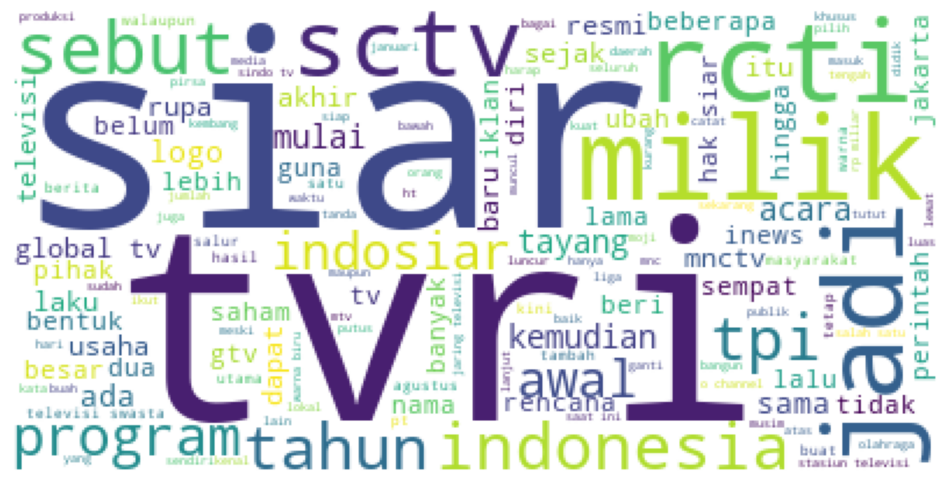

In [83]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

string = ' '.join(hasil3)
wordcloud = WordCloud(background_color="white").generate(string)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

Sebelum melakukan tahap clustering, data yang sudah dibersihkan dapat dilihat wordcloudnya. Dari wordcloud tersebut, terlihat bahwa kata yang sering muncul adalah tvri, siar, indonesia, sebut, sctv, milik, rcti, jadi, dll. Hal ini dikarenakan data yang diambil merupakan artikel siaran televisi di indonesia yang menjelaskan definisi, sejarah, dan pengenalan lainnya.

# Clustering

## TF-IDF Vectorization

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(hasil3)

Bagian ini melakukan vektorisasi teks menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). TfidfVectorizer dari pustaka sklearn digunakan untuk mengubah teks yang telah di-stemming dalam hasil3 menjadi representasi numerik yang dapat digunakan untuk clustering.

Hasilnya, tfidf_matrix, adalah matriks yang menyajikan dokumen dalam bentuk vektor berdimensi tinggi, di mana setiap dimensi mewakili bobot dari kata-kata dalam dokumen, membantu dalam analisis dan clustering data teks.

# Hierarchical Clustering

## Dendogram

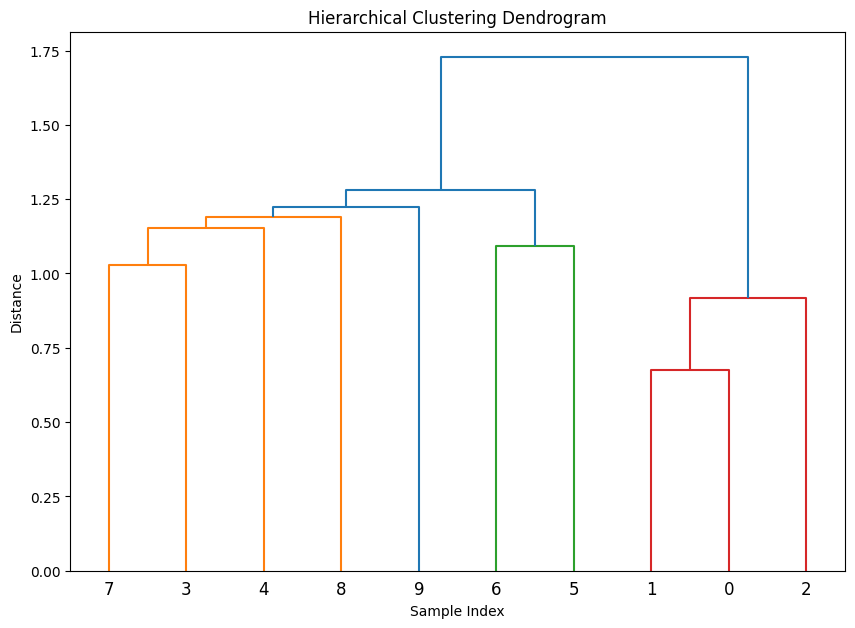

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(tfidf_matrix.toarray(), method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Dendrogram yang ditampilkan menunjukkan bahwa dokumen-dokumen dikelompokkan dalam beberapa cluster berdasarkan kemiripan mereka.

Pada output ini, terlihat bahwa pada awalnya, dokumen-dokumen digabungkan dalam kelompok-kelompok kecil dengan jarak penggabungan yang relatif rendah, menunjukkan kemiripan yang tinggi di antara dokumen-dokumen tersebut. Namun, seiring berjalannya waktu, jarak penggabungan meningkat, menunjukkan bahwa dokumen-dokumen yang digabungkan pada tahap selanjutnya memiliki kemiripan yang lebih rendah.

Secara spesifik, dapat terlihat beberapa titik pemisahan besar yang menunjukkan jarak penggabungan yang signifikan. Titik-titik ini adalah indikasi bahwa cluster yang digabungkan pada jarak tersebut memiliki perbedaan. 

## Silhoutte Score

In [94]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

num_clusters = 3
hierarchical_cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hierarchical_cluster.fit_predict(tfidf_matrix.toarray())

silhouette_avg = silhouette_score(tfidf_matrix.toarray(), cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')


Silhouette Score: 0.132


c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clustering dilakukan menggunakan algoritma AgglomerativeClustering dengan 3 cluster, menggunakan jarak euclidean dan metode ward untuk menghitung jarak antar dokumen. Setelah pengelompokan, Silhouette Score dihitung untuk mengevaluasi seberapa baik dokumen-dokumen berada dalam cluster masing-masing. Nilai Silhouette Score sebesar 0.132 menunjukkan bahwa kualitas clustering cukup rendah, artinya dokumen dalam cluster mungkin tidak terlalu mirip satu sama lain atau ada tumpang tindih antar cluster.

## Menampilkan Hasil Clustering

In [108]:
clusters = {i: [] for i in range(num_clusters)}
for idx, label in enumerate(cluster_labels):
    clusters[label].append((judul[idx], hasil3[idx]))  # Menyimpan nama artikel dan teks

for cluster_id, titles in clusters.items():
    print(f"\nCluster {cluster_id}: {[title[0] for title in titles]}")  # Nama artikel TV
    print("Isi cluster:")
    for title, content in titles:
        print(f" - {content}")



Cluster 0: ['RCTI', 'MNCTV', 'SCTV', 'Indosiar', 'Moji']
Isi cluster:
 - rcti singkat rajawali citra televisi indonesia salah satu jaring televisi swasta indonesia milik media nusantara citra mnc rcti rupa televisi swasta pertama indonesia diri awal usaha patungan bimantara citra rajawali wira bhakti utama rcti pertama udara 13 november 1988 resmi 24 agustus 1989 pukul 13 30 wib siar rcti tangkap langgan milik dekoder bayar iur bulan jakarta rcti lepas dekoder 24 agustus 1990 tahun mulai udara resmi tanda mula siar free-to-air walaupun status stasiun televisi lokal tiga tahun kemudian 24 agustus 1993 rcti resmi siar nasional sejak oktober 2003 rcti milik media nusantara citra kelompok usaha media milik gtv mnctv inews sejarah muncul siar awal dapat tiga tokoh utama peran lahir rcti peter sondakh peter f gontha bambang trihatmodjo sondakh-lah usul ide hadir televisi swasta indonesia selalu tolak aju proposal departemen terang deppen sondakh baru sukses hasil dekat bambang tri lewat ban

Hasil clustering membagi 10 stasiun TV ke dalam tiga cluster berdasarkan kemiripan konten Wikipedia yang telah diolah sebelumnya. Berikut adalah penjelasan mengenai hasil clustering:

Cluster 0: Berisi RCTI, MNCTV, SCTV, Indosiar, dan Moji. Stasiun-stasiun TV ini cenderung dimiliki atau terkait dengan grup media besar seperti MNC Group (RCTI, MNCTV) dan Emtek Group (SCTV, Indosiar). Kemiripan ini bisa jadi didasarkan pada konten terkait kepemilikan, orientasi pasar, atau program-program yang disiarkan oleh masing-masing stasiun TV, seperti program hiburan dan berita.

Cluster 1: Berisi TVRI, TVRI World, dan TVRI Sport. Semua stasiun di cluster ini adalah bagian dari TVRI, yang merupakan lembaga penyiaran publik di Indonesia. Konten halaman Wikipedia mereka mungkin serupa karena berbicara tentang visi-misi lembaga penyiaran publik, serta fokus pada program-program edukasi, berita, dan olahraga (seperti TVRI Sport).

Cluster 2: Berisi GTV dan iNews. Keduanya juga berada di bawah MNC Group, namun mungkin dibedakan dari cluster lain karena fokus konten yang berbeda. GTV cenderung lebih banyak menyiarkan program hiburan dan film, sedangkan iNews adalah saluran berita 24 jam. Perbedaan ini bisa memengaruhi konten halaman Wikipedia, yang akhirnya memisahkan mereka ke dalam cluster yang berbeda dari stasiun-stasiun di Cluster 0.

Nilai Silhouette Score yang rendah (0.132) mengindikasikan bahwa pemisahan cluster belum optimal, dengan kemungkinan beberapa dokumen yang berada di perbatasan antara cluster atau ada tumpang tindih konten antara cluster-cluster tersebut.

## Wordcloud Cluster

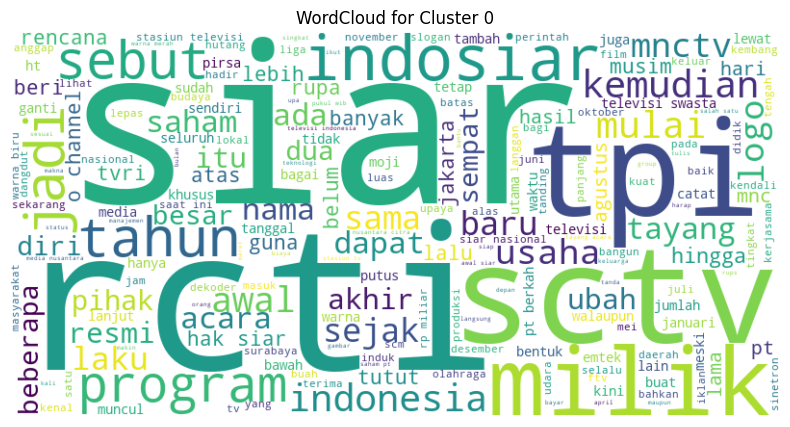

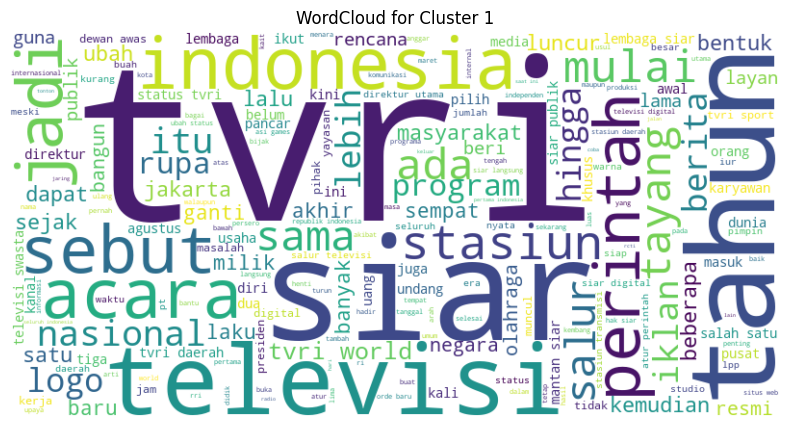

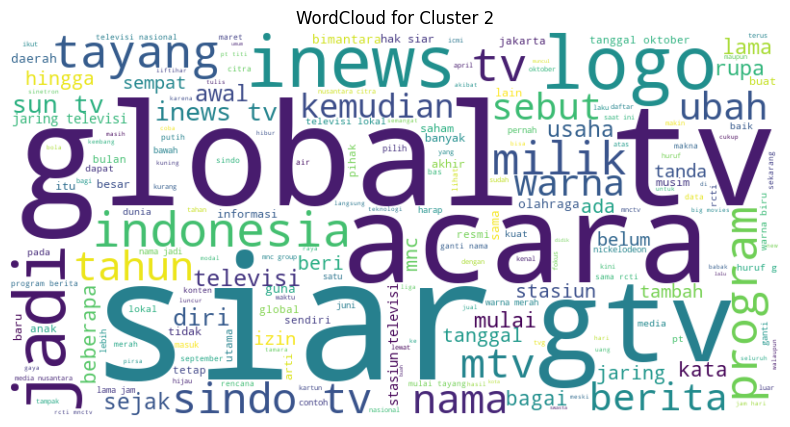

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cluster_id, titles in clusters.items():
    text = " ".join([content for _, content in titles])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Cluster {cluster_id}")
    plt.show()

Setelah melakukan tahap clustering, setiap cluster ditampilkan wordcloudnya. Dari wordcloud tersebut, terlihat bahwa kata yang sering muncul pada cluster 0 adalah siar, rcti. Sedangkan cluster 1 adalah TVRI dan Siar. Kemudian cluster 1 adalah global, acara, siar